## По материалам курса "Вводный курс ML" (Дмитрий Макаров). Тема "Временные ряды"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
passengers = pd.read_csv('/content/passengers.csv', index_col = 'Month', parse_dates = True)

In [ ]:
passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
#Изменение шага
passengers.resample(rule = 'AS').mean().head()

,#Passengers
Month,
1949-01-01,126.666667
1950-01-01,139.666667
1951-01-01,170.166667
1952-01-01,197.000000
1953-01-01,225.000000


In [ ]:
#Сдвиг
passengers.shift(2, axis = 0).head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,112.0
1949-04-01,118.0
1949-05-01,132.0


In [ ]:
#Скользящее среднее в рамках окна
passengers.rolling(window = 3).mean().head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,120.666667
1949-04-01,126.333333
1949-05-01,127.333333


[Text(0, 0.5, 'Количество пассажиров'),
 Text(0.5, 0, 'Месяцы'),
 Text(0.5, 1.0, 'Перевозки пассажиров с 1949 по 1960 год')]

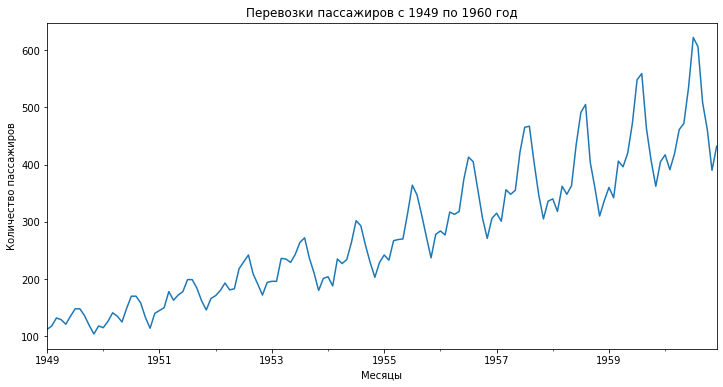

In [ ]:
ax = passengers.plot(figsize = (12,6), legend = None)
ax.set(title = 'Перевозки пассажиров с 1949 по 1960 год', xlabel = 'Месяцы', ylabel = 'Количество пассажиров')

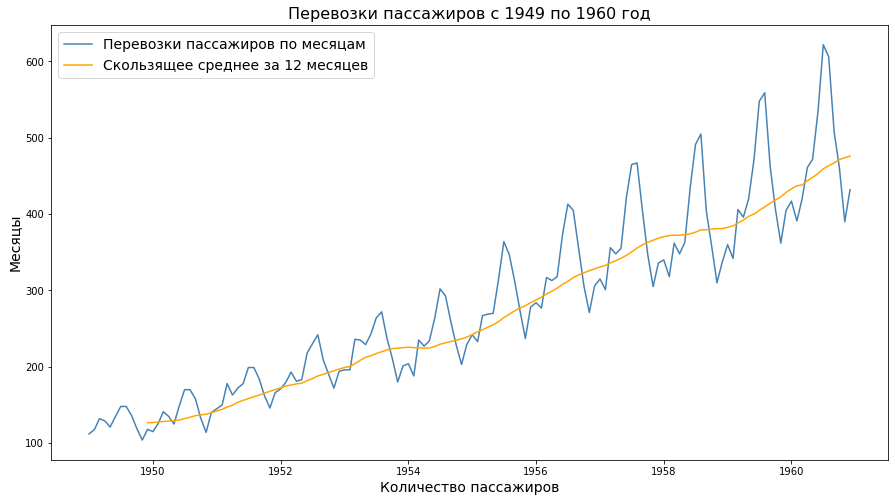

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(passengers, label = 'Перевозки пассажиров по месяцам', color = 'steelblue')
plt.plot(passengers.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')
plt.legend(title = '', loc = 'upper left', fontsize = 14)
plt.ylabel('Месяцы', fontsize = 14)
plt.xlabel('Количество пассажиров', fontsize = 14)
plt.title('Перевозки пассажиров с 1949 по 1960 год', fontsize = 16)
plt.show()



*   Тренд — долгосрочное изменение уровня ряда
*   Сезонность предполагает циклические изменения уровня ряда с постоянным периодом
* Случайные колебания — непрогнозируемое случайное изменение ряда



In [ ]:
births = pd.read_csv('/content/births.csv', index_col = 'Date', parse_dates = True)
births.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


### Разложение временного ряда на компоненты

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

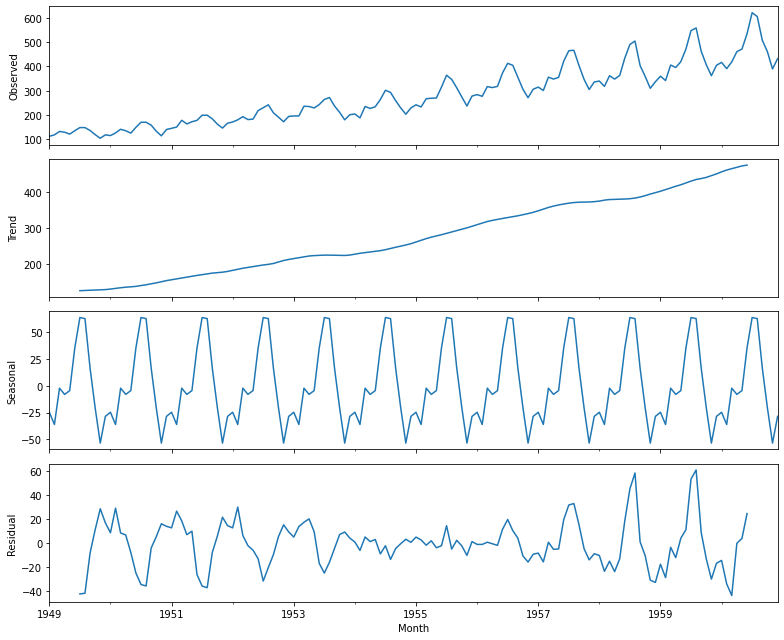

In [ ]:
decompose = seasonal_decompose(passengers)
decompose.plot()
 
plt.show()

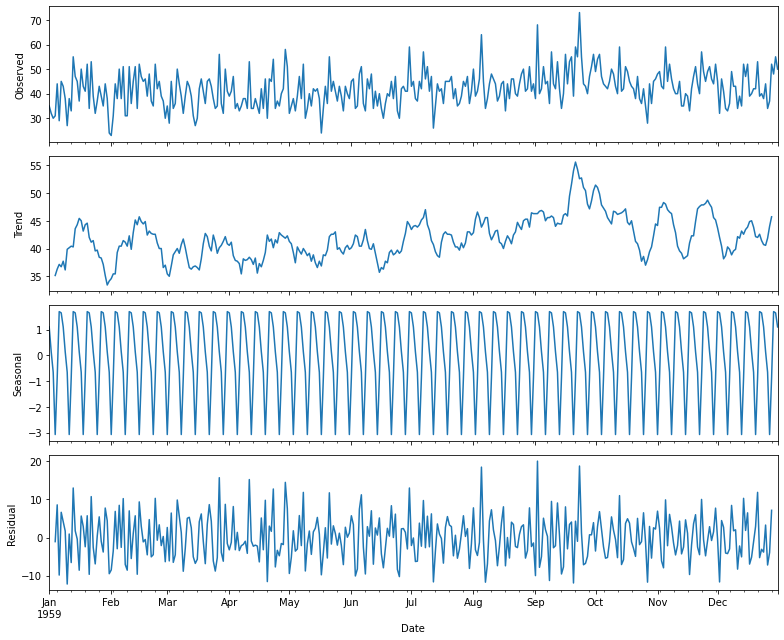

In [ ]:
decompose = seasonal_decompose(births)
decompose.plot()
 
plt.show()

### Стационарность

Стационарность (stationarity) временного ряда как раз означает, что такие компоненты как тренд и сезонность отсутствуют (среднее значение и дисперсия не меняются со смещением во времени).

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#  Тест Дики-Фуллера
adf_test = adfuller(passengers['#Passengers'])
print('p-value = ' + str(adf_test[1]))

p-value = 0.9918802434376409


In [ ]:
adf_test = adfuller(births['Births'])
print('p-value = ' +str(adf_test[1]))

p-value = 5.243412990149865e-05


### Автокорреляция

In [ ]:
data = np.array([16, 21, 15, 24, 18, 17, 20])
lag_1 = data[1:]
np.round(np.corrcoef(data[:-1], lag_1)[0,1], 2)

-0.71

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

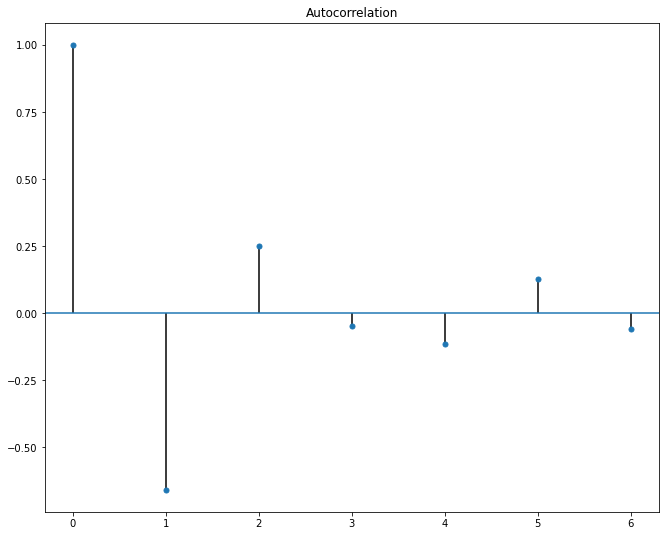

In [ ]:
plot_acf(data, alpha = None)
plt.show()

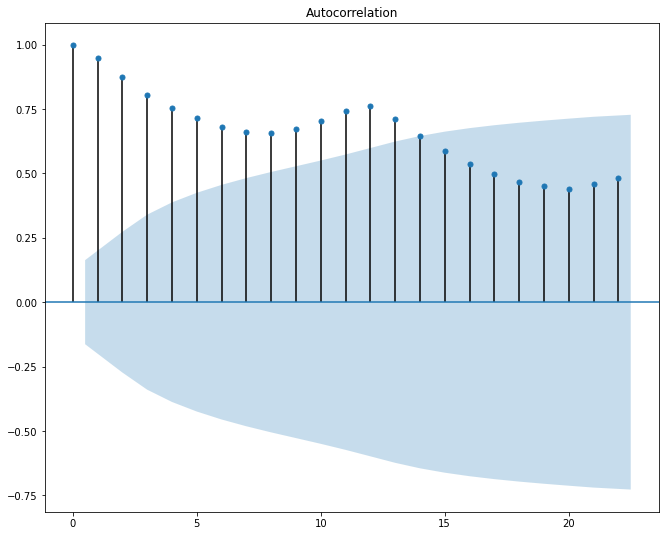

In [ ]:
plot_acf(passengers)
plt.show()



1.   Мы видим, что лаг 12 сильнее коррелирует с исходным рядом, чем соседние лаги 10 и 11. То же самое можно сказать и про лаг 24. Такая автокорреляция позволяет предположить наличие (ежегодных) сезонных колебаний.
2.   То, что корреляция постоянно положительная говорит о наличии тренда.
3.   Синяя граница позволяет оценить статистическую значимость корреляции. Если столбец выходит за ее пределы, то автокорреляция достаточно сильна и ее можно использовать при построении модели.



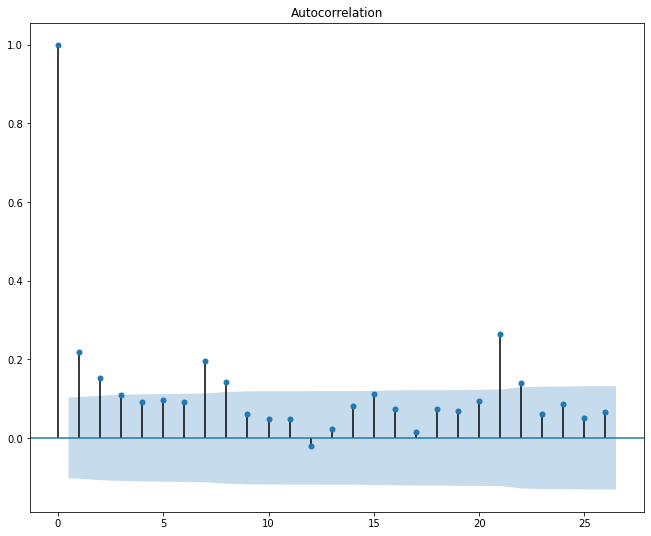

In [ ]:
plot_acf(births)
plt.show()

### Экспоненциальное сглаживание

In [ ]:
alpha = 0.2
exp_smoothing = [births['Births'][0]]
for i in range(0, len(births['Births'])):
  exp_smoothing.append(alpha * births['Births'][i] + (1 - alpha) * exp_smoothing[i - 1])


In [ ]:
births['Exp_smoothing'] = exp_smoothing[:-1]
births.tail(4)

,Births,Exp_smoothing
Date,,
1959-12-28,52,41.714266
1959-12-29,48,42.708933
1959-12-30,55,42.971413
1959-12-31,50,45.167146


In [ ]:
from datetime import timedelta
last_date = births.iloc[[-1]].index
last_date = last_date + timedelta(days = 1)
last_date

DatetimeIndex(['1960-01-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
data = {'Exp_smoothing' : exp_smoothing[-1]}
births = births.append(pd.DataFrame(data, index = last_date))
births.tail(4)

,Births,Exp_smoothing
Date,,
1959-12-29,48.0,42.708933
1959-12-30,55.0,42.971413
1959-12-31,50.0,45.167146
1960-01-01,NaN,44.377130


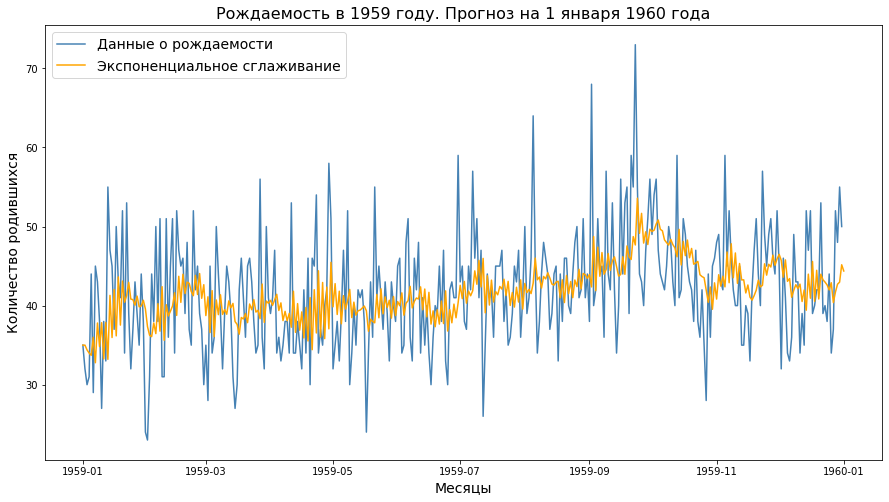

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(births['Births'], label = 'Данные о рождаемости', color = 'steelblue')
plt.plot(births['Exp_smoothing'], label = 'Экспоненциальное сглаживание', color = 'orange')
plt.legend(title = '', loc = 'upper left', fontsize = 14)
plt.ylabel('Количество родившихся', fontsize = 14)
plt.xlabel('Месяцы', fontsize = 14)
plt.title('Рождаемость в 1959 году. Прогноз на 1 января 1960 года', fontsize = 16)
plt.show()

### Модель SARIMAX

Модель ARMA с параметрами (или как еще говорят порядками, orders) p и q или ARMA(p, q) позволяет описать любой стационарный временной ряд.

ARMA предполагает, что в данных отсутствует тренд и сезонность (данные стационарны). Если данные нестационарны, нужно использовать более сложные версии этих моделей:

ARIMA, здесь добавляется компонент Integrated (I), который отвечает за удаление тренда (сам процесс называется дифференцированием); и
SARIMA, эта модель учитывает сезонность (Seasonality, S)
SARIMAX включает еще и внешние или экзогенные факторы (eXogenous factors, отсюда и буква X в названии), которые напрямую не учитываются моделью, но влияют на нее.

Параметров у модели SARIMAX больше. Их полная версия выглядит как SARIMAX(p, d, q) x (P, D, Q, s). В данном случае, помимо известных параметров p и q, у нас появляется параметр d, отвечающий за тренд, а также набор параметров (P, D, Q, s), отвечающих за сезонность.

In [ ]:
train = passengers[:'1959-12']
test = passengers['1960-01':]

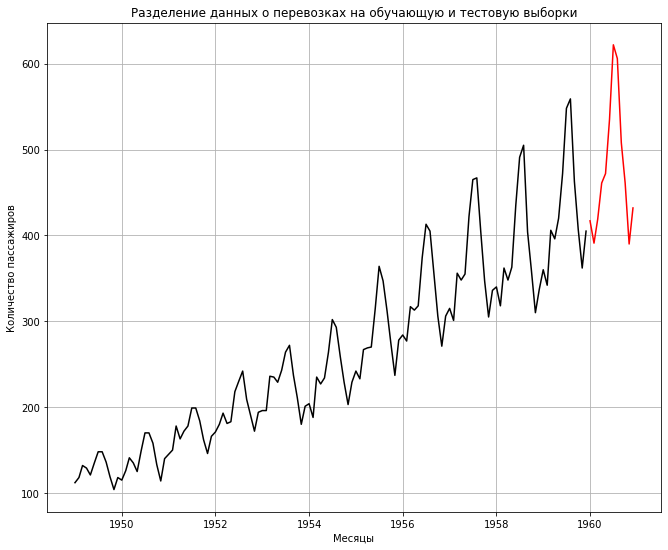

In [ ]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title('Разделение данных о перевозках на обучающую и тестовую выборки')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
plt.grid()
plt.show()

In [ ]:
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train, 
                order = (3, 0, 0), 
                seasonal_order = (0, 1, 0, 12))

In [ ]:
result = model.fit()

In [ ]:
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -451.953
Date:                            Mon, 31 Jan 2022   AIC                            911.907
Time:                                    15:40:26   BIC                            923.056
Sample:                                01-01-1949   HQIC                           916.435
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7603      0.088      8.672      0.000       0.588       0.932
ar.L2          0.2875      0.133   

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start, end)
predictions

1960-01-01    422.703384
1960-02-01    404.947176
1960-03-01    466.293255
1960-04-01    454.781293
1960-05-01    476.848624
1960-06-01    527.162822
1960-07-01    601.449804
1960-08-01    610.821686
1960-09-01    513.229981
1960-10-01    455.692612
1960-11-01    409.200040
1960-12-01    450.754153
Freq: MS, dtype: float64

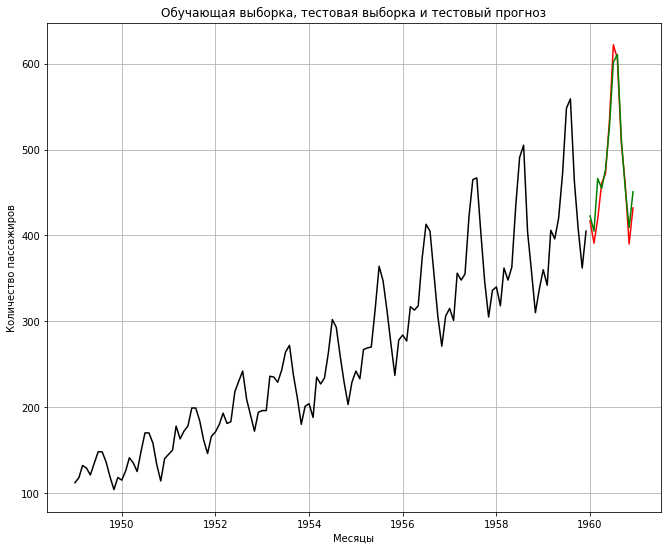

In [ ]:
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.plot(predictions, color = 'green')
plt.title('Обучающая выборка, тестовая выборка и тестовый прогноз')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(mean_squared_error(test, predictions))
print(np.sqrt(mean_squared_error(test, predictions)))

317.3956033499037
17.815599999716643


In [ ]:
start = len(passengers)
end = (len(passengers) - 1) + 3 * 12
forecast = result.predict(start, end)
forecast[-12:]

1963-01-01    518.603408
1963-02-01    497.908958
1963-03-01    556.406753
1963-04-01    542.133803
1963-05-01    561.524730
1963-06-01    609.244530
1963-07-01    681.016603
1963-08-01    687.950631
1963-09-01    587.995766
1963-10-01    528.167641
1963-11-01    479.454500
1963-12-01    518.856081
Freq: MS, dtype: float64

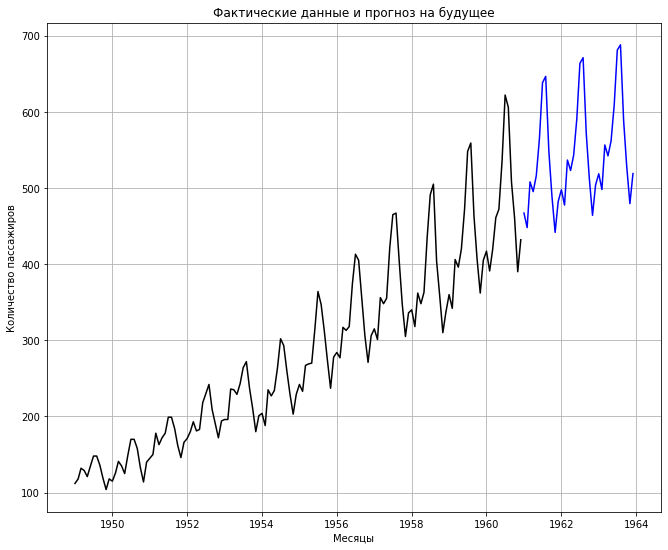

In [ ]:
plt.plot(passengers, color = 'black')
plt.plot(forecast, color = 'blue')
plt.title('Фактические данные и прогноз на будущее')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
plt.grid()
plt.show()